# Bank Marketing DataSet - Intelligent Targeting:
->Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign.

# The 4 Ps:
1) Segment of the Population: To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign.

2) Distribution channel to reach the customer's place: Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.)

3) Price: What is the best price to offer to potential clients? (In the case of the bank's marketing campaign this is not necessary since the main interest for the bank is for potential clients to open depost accounts in order to make the operative activities of the bank to keep on running.)

4) Promotional Strategy: This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an indepth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

# What is a Term Deposit?
A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

# Outline:
A. Attribute Descriptions
I. Bank client data
II. Related with the last contact of the current campaign
III. Other attributes

B. Structuring the data:
I. Overall Analysis of the Data
II. Data Structuring and Conversions

C. Exploratory Data Analysis (EDA)
I. Accepted vs Rejected Term Deposits
II. Distribution Plots

D. Different Aspects of the Analysis:
I. Months of Marketing Activty
II. Seasonalities
III. Number of Calls to the potential client
IV. Age of the Potential Clients
V. Types of Occupations that leads to more term deposits suscriptions

E. Correlations that impacted the decision of Potential Clients. I. Analysis of our Correlation Matrix
II. Balance Categories vs Housing Loans
III. Negative Relationship between H.Loans and Term Deposits

F. Classification Model
I. Introduction
II. Stratified Sampling
III. Classification Models
IV. Confusion Matrix
V. Precision and Recall Curve
VI. Feature Importances Decision Tree C.

G. Next Campaign Strategy
I. Actions the Bank should Consider

# A. Attributes Description:
Input variables:
    

# Ai. bank client data:
1 - age: (numeric)
2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education: (categorical: primary, secondary, tertiary and unknown)
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
8 - balance: Balance of the individual.

# Aii. Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# Aiii. other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [8]:
%matplotlib inline

import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
import gc
import matplotlib.pyplot as plt
import seaborn as sb
#from fastai.imports import *
#from fastai.structured import *
#from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
#import missingno as msno
from sklearn.model_selection import train_test_split
import statistics
from imblearn.over_sampling import SMOTE
import numpy as np
#import sklearn.metrics import accuracy_score 

In [11]:
df = pd.read_csv('bank-data.csv', sep=';')
term_deposits = df.copy()

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploring the Basics
* Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)

* The mean balance is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.

* As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client.

* Note: There are not that much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns".

In [14]:
df.shape

(41188, 21)

In [5]:
#Checking the missing value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [13]:
df.shape

(41188, 21)

In [15]:
# Split into predictor and response dataframes.

X_df = df.drop('y', axis=1)
y = df['y']

X_df.shape,y.shape

((41188, 20), (41188,))

In [16]:
# Map response variable to integers 0,1.

y = pd.Series(np.where(y.values == 'yes',1,0), y.index)

In [17]:
y.value_counts()

0    36548
1     4640
dtype: int64

In [18]:
# Separating with continuous and categorical variables.

X_cont = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
X_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

cont_df = X_df[X_cont]
cat_df = X_df[X_cat]

In [19]:
# Converting categorical features to numerical values.

cat_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [20]:
# Initial numeric dataframe

X_df = cont_df.join(pd.get_dummies(cat_df))

In [21]:
X_df.shape

(41188, 61)

In [22]:
X_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [23]:
# Split into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 61), (8238, 61), (32950,), (8238,))

In [24]:
# Initial logistic regression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.001)
model_base = clf.fit(X_train, y_train)

In [25]:
y_pred = model_base.predict(X_test)
model_base.score(X_test, y_test)

print("Model accuracy is", model_base.score(X_test, y_test))

Model accuracy is 0.8964554503520272


In [26]:
metrics.confusion_matrix(y_test, y_pred)
# print(metrics.classification_report(y_test, y_pred))

array([[7221,   89],
       [ 764,  164]], dtype=int64)

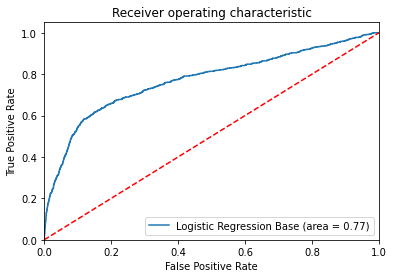

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_test, model_base.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_base.predict_proba(X_test)[:,1])
# plt.figure()

probs = model_base.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
logit_roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression Base (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [28]:
df.apply(lambda x: len(x.unique()), axis=0)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [29]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [30]:
# Label Encode instead of dummy variables

mappings = []

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_df = df.drop('y', axis=1)
for i, col in enumerate(label_df):
    if label_df[col].dtype == 'object':
        label_df[col] = label_encoder.fit_transform(np.array(label_df[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(label_df, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 20), (8238, 20), (32950,), (8238,))

C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy is 0.9041029376062151


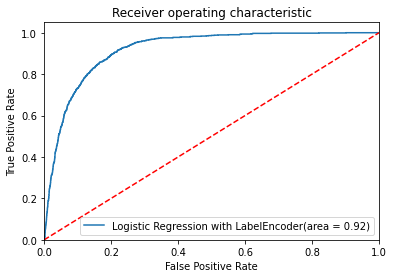

In [32]:
clf = LogisticRegression()
model_label = clf.fit(X_train, y_train)
# y_pred = model_norm.predict(X_test)
print("Model accuracy is", model_label.score(X_test, y_test))

# logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])

probs = model_label.predict_proba(X_test)
preds = probs[:,1]
labelfpr, labeltpr, labelthreshold = metrics.roc_curve(y_test, preds)
label_roc_auc = metrics.auc(labelfpr, labeltpr)

plt.figure()
plt.plot(labelfpr, labeltpr, label='Logistic Regression with LabelEncoder(area = %0.2f)' % label_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [33]:
mappings

[{'admin.': 1,
  'blue-collar': 2,
  'entrepreneur': 3,
  'housemaid': 4,
  'management': 5,
  'retired': 6,
  'self-employed': 7,
  'services': 8,
  'student': 9,
  'technician': 10,
  'unemployed': 11,
  'unknown': 12},
 {'divorced': 1, 'married': 2, 'single': 3, 'unknown': 4},
 {'basic.4y': 1,
  'basic.6y': 2,
  'basic.9y': 3,
  'high.school': 4,
  'illiterate': 5,
  'professional.course': 6,
  'university.degree': 7,
  'unknown': 8},
 {'no': 1, 'unknown': 2, 'yes': 3},
 {'no': 1, 'unknown': 2, 'yes': 3},
 {'no': 1, 'unknown': 2, 'yes': 3},
 {'cellular': 1, 'telephone': 2},
 {'apr': 1,
  'aug': 2,
  'dec': 3,
  'jul': 4,
  'jun': 5,
  'mar': 6,
  'may': 7,
  'nov': 8,
  'oct': 9,
  'sep': 10},
 {'fri': 1, 'mon': 2, 'thu': 3, 'tue': 4, 'wed': 5},
 {'failure': 1, 'nonexistent': 2, 'success': 3}]

In [34]:
educ_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

In [35]:
mappings2 = []

# using cat.codes for order, one hot for high cardinality and weak case of cardinality.

def ordered_labels(df, col, order):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.reorder_categories(order, ordered=True)
    df[col] = df[col].cat.codes.astype(int)

label_df_2 = df.drop('y', axis=1)

# Use dummy variables for occupation
label_df_2 = pd.concat([label_df_2, pd.get_dummies(label_df_2['job'])],axis=1).drop('job',axis=1)

# Use ordered cat.codes for days, months, and education
ordered_labels(label_df_2, 'education', educ_order)
ordered_labels(label_df_2, 'month', month_order)
ordered_labels(label_df_2, 'day_of_week', day_order)

# Same label encoding for rest since low cardinality
for i, col in enumerate(label_df_2):
    if label_df_2[col].dtype == 'object':
        label_df_2[col] = label_encoder.fit_transform(np.array(label_df_2[col].astype(str)).reshape((-1,)))
        mappings2.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

label_df_2.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,56,1,2,0,0,0,1,2,0,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0
1,57,1,5,1,0,0,1,2,0,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0
2,37,1,5,0,2,0,1,2,0,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0
3,40,1,3,0,0,0,1,2,0,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0
4,56,1,5,0,0,2,1,2,0,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0


C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy is 0.9053168244719592


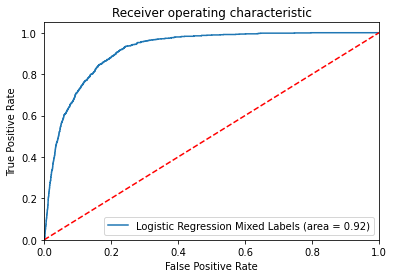

In [36]:
X_train, X_test, y_train, y_test = train_test_split(label_df_2, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

clf = LogisticRegression()
model_mix = clf.fit(X_train, y_train)
# y_pred = model_norm.predict(X_test)
print("Model accuracy is", model_mix.score(X_test, y_test))

# logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])

classes = model_mix.predict(X_test)
probs = model_mix.predict_proba(X_test)
preds = probs[:,1]
mixfpr, mixtpr, mixthreshold = metrics.roc_curve(y_test, preds)
mix_roc_auc = metrics.auc(mixfpr, mixtpr)

plt.figure()
plt.plot(mixfpr, mixtpr, label='Logistic Regression Mixed Labels (area = %0.2f)' % mix_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 31), (8238, 31), (32950,), (8238,))

In [38]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      7692
           1       0.37      0.64      0.47       546

    accuracy                           0.91      8238
   macro avg       0.67      0.78      0.71      8238
weighted avg       0.93      0.91      0.92      8238



## Feature Importance

In [39]:
# Feature importance rankings.

weights = zip(label_df_2.columns, model_mix.coef_[0])
ranked_weights = sorted(weights, key=lambda x: x[1], reverse = True)

In [40]:
# Top 10 positive feature importance

ranked_weights[:10]

[('cons.price.idx', 0.34430093886633756),
 ('poutcome', 0.06748259982735164),
 ('marital', 0.060611682177751994),
 ('cons.conf.idx', 0.043679625767414305),
 ('education', 0.03219093819379786),
 ('retired', 0.03147380217688849),
 ('admin.', 0.030660398278047965),
 ('student', 0.026026940560415983),
 ('month', 0.014385715172309636),
 ('technician', 0.010601857148408061)]

In [41]:
# Top 10 negative feature importance

ranked_weights[-10:]

[('management', -0.007393587670143742),
 ('day_of_week', -0.01114571834686585),
 ('loan', -0.01427939265225126),
 ('services', -0.02371887037167958),
 ('previous', -0.03755995567935601),
 ('default', -0.06461658775208184),
 ('blue-collar', -0.06479964528439423),
 ('contact', -0.07886089744872508),
 ('emp.var.rate', -0.21797953722793212),
 ('euribor3m', -0.2568150073427067)]

In [42]:
abs_weights = zip(label_df_2.columns, model_mix.coef_[0]) 
abs_ranked_weights = sorted(abs_weights, key=lambda x: abs(x[1]), reverse = True)
abs_ranked_weights[:10]

[('cons.price.idx', 0.34430093886633756),
 ('euribor3m', -0.2568150073427067),
 ('emp.var.rate', -0.21797953722793212),
 ('contact', -0.07886089744872508),
 ('poutcome', 0.06748259982735164),
 ('blue-collar', -0.06479964528439423),
 ('default', -0.06461658775208184),
 ('marital', 0.060611682177751994),
 ('cons.conf.idx', 0.043679625767414305),
 ('previous', -0.03755995567935601)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

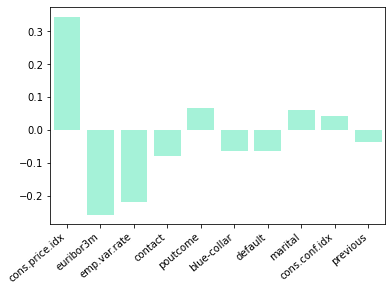

In [43]:
# Absolute value feature importance plot

labels, weights = zip(*abs_ranked_weights[:10])
sb.barplot(x = pd.Series(labels), y = pd.Series(weights), color='aquamarine', alpha=0.8)
plt.xticks(rotation=40, ha='right')

## Feature engineering

In [44]:
X_df_2 = label_df_2.copy()

In [45]:
# Creating binary variable for whether there was previous contact.

X_df_2[(X_df_2['previous'] == 0) & (X_df_2['pdays'] != 999)]

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown


In [46]:
X_df_2['previous_contact'] = np.where(X_df_2['pdays'] == 999, 0, 1)

# X_df_2 = X_df_2.drop('pdays', axis = 1)

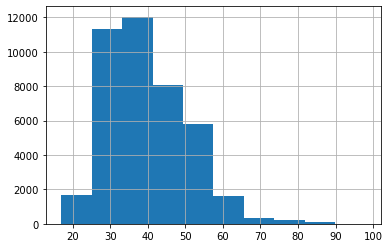

In [47]:
X_df_2['age'].hist()

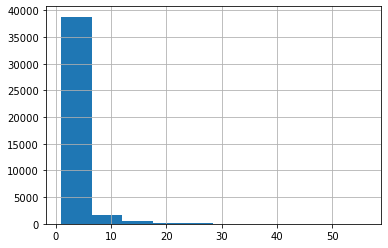

In [48]:
X_df_2['campaign'].hist()

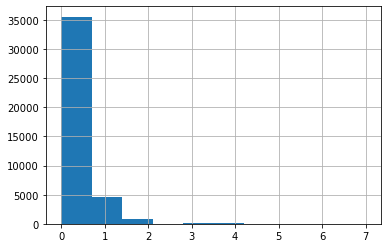

In [49]:
X_df_2['previous'].hist()

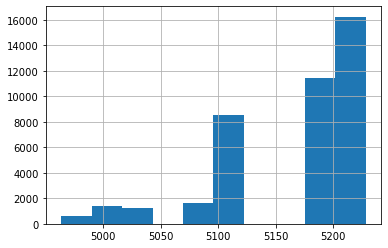

In [50]:
X_df_2['nr.employed'].hist()

In [51]:
def bins5(df, col):
    df[col] = pd.cut(df[col], 5, labels=range(5)).astype(int)

In [52]:
bins5(X_df_2, 'age')
bins5(X_df_2, 'campaign')
bins5(X_df_2, 'previous')
bins5(X_df_2, 'nr.employed')

In [53]:
# SMOTE for rebalancing

y.value_counts()[1]/y.value_counts().sum()

0.11265417111780131

In [54]:
# Threshold setting for coefficient size.

coef_thresh = np.percentile(abs(model_mix.coef_[0]), 10)
coef_thresh

0.002986560228221885

In [55]:
# Features with very low coefficients that do not contribute much to the model.

low_coefs = [feature[0] for feature in abs_ranked_weights if abs(feature[1]) < coef_thresh]
low_coefs

['pdays', 'unknown', 'campaign']

In [56]:
# Drop low importance features

# X_df_2 = X_df_2.drop(columns = low_coefs)
X_df_2.shape

(41188, 32)

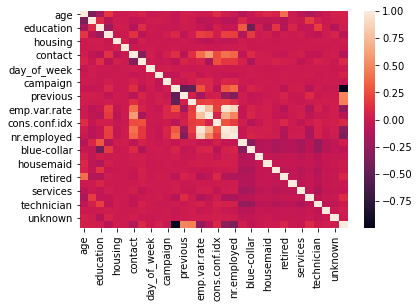

In [57]:
sb.heatmap(X_df_2.corr())

In [58]:
# Highly correlated features

corr_mat = X_df_2.corr()
half_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
half_corr_mat.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,previous_contact
age,NaN,-0.367115,-0.172745,0.155196,-0.000699,-0.005032,0.015743,0.061888,-0.017328,-0.000216,0.009316,-0.034401,0.025630,0.016742,-0.002610,0.004805,0.111415,0.008032,-0.010023,-0.103111,-0.017154,0.034278,0.081086,0.061350,0.390116,-0.000509,-0.065628,-0.160948,-0.057496,-0.004555,0.041177,0.034332
marital,NaN,NaN,0.101376,-0.079450,0.010467,0.005788,-0.054501,-0.018653,0.014472,0.010290,-0.000793,-0.037942,0.030215,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.093401,0.075428,-0.045265,-0.047839,-0.055181,-0.051110,-0.108069,0.002293,-0.009286,0.184116,0.040090,-0.009826,0.009834,0.037973
education,NaN,NaN,NaN,-0.218989,0.020847,0.011312,-0.108651,0.115857,-0.004091,-0.015618,-0.008072,-0.021797,0.009868,0.005603,-0.038992,-0.096554,0.038230,-0.030160,-0.026079,0.297503,-0.443976,0.026201,-0.119471,0.154868,-0.106842,0.074657,-0.051706,-0.053444,0.189820,0.003098,-0.109193,0.021739
default,NaN,NaN,NaN,NaN,-0.015815,-0.003782,0.135238,-0.084322,-0.004286,-0.011794,0.015962,0.080062,-0.061552,0.023417,0.203263,0.168073,0.026522,0.195336,0.189170,-0.121372,0.176382,-0.001008,0.036796,-0.035507,0.010070,-0.004843,0.017599,-0.032609,-0.069124,0.010481,0.055630,-0.080066
housing,NaN,NaN,NaN,NaN,NaN,0.044296,-0.082186,0.031865,-0.009003,-0.007658,-0.009633,-0.010551,0.006895,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.050101,0.009949,-0.015214,0.004480,-0.004205,-0.007936,-0.001892,-0.000393,-0.004397,0.004656,0.010149,0.008631,-0.001290,0.010518


In [59]:
[col for col in half_corr_mat if any(half_corr_mat[col] > 0.9)]

['euribor3m', 'nr.employed']

In [60]:
X_df_2.dtypes

age                   int32
marital               int32
education             int32
default               int32
housing               int32
loan                  int32
contact               int32
month                 int32
day_of_week           int32
duration              int64
campaign              int32
pdays                 int64
previous              int32
poutcome              int32
emp.var.rate        float64
cons.price.idx      float64
cons.conf.idx       float64
euribor3m           float64
nr.employed           int32
admin.                uint8
blue-collar           uint8
entrepreneur          uint8
housemaid             uint8
management            uint8
retired               uint8
self-employed         uint8
services              uint8
student               uint8
technician            uint8
unemployed            uint8
unknown               uint8
previous_contact      int32
dtype: object

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_df_2, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 32), (8238, 32), (32950,), (8238,))

In [62]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy is 0.906409322651129


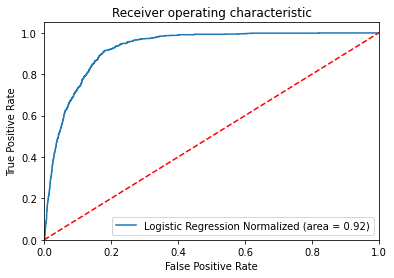

In [63]:
clf = LogisticRegression()
model_norm = clf.fit(X_train, y_train)
# y_pred = model_norm.predict(X_test)
print('Model accuracy is',model_norm.score(X_test, y_test))

# logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])

probs = model_norm.predict_proba(X_test)
preds = probs[:,1]
normfpr, normtpr, normthreshold = metrics.roc_curve(y_test, preds)
norm_roc_auc = metrics.auc(normfpr, normtpr)

plt.figure()
plt.plot(normfpr, normtpr, label='Logistic Regression Normalized (area = %0.2f)' % norm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [64]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [65]:
clf = LogisticRegression()
model_res = clf.fit(X_train_res, y_train_res)
print('Model accuracy is',model_res.score(X_test, y_test))

Model accuracy is 0.8659868900218499


C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


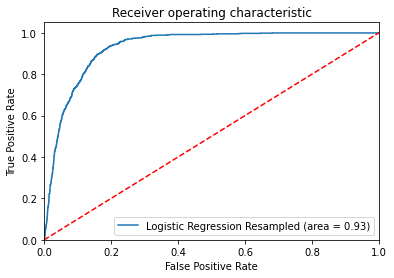

In [66]:
probs = model_res.predict_proba(X_test)
preds = probs[:,1]
resfpr, restpr, resthreshold = metrics.roc_curve(y_test, preds)
res_roc_auc = metrics.auc(resfpr, restpr)

plt.figure()
plt.plot(resfpr, restpr, label='Logistic Regression Resampled (area = %0.2f)' % res_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [67]:
norm_roc_auc, res_roc_auc

(0.9248469857068731, 0.9291063257700836)

In [68]:
# Statistical logistic model

import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary(xname=list(X_df_2.columns)))

Optimization terminated successfully.
         Current function value: 0.209280
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                32950
Model:                          Logit   Df Residuals:                    32918
Method:                           MLE   Df Model:                           31
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                  0.4055
Time:                        16:44:08   Log-Likelihood:                -6895.8
converged:                       True   LL-Null:                       -11599.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
age                 -0.0397      0.144     -0.275      0.783      -0.323       0.243
marital    

## Random Forest Implementation

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
clf = RandomForestClassifier(n_jobs=-1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_df_2, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model_rf = clf.fit(X_train, y_train)
print('Model accuracy is',model_rf.score(X_test, y_test))

Model accuracy is 0.9101723719349356


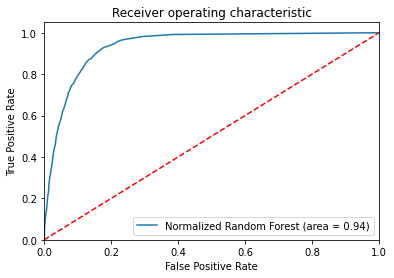

In [72]:
probs = model_rf.predict_proba(X_test)
preds = probs[:,1]
rffpr, rftpr, rfthreshold = metrics.roc_curve(y_test, preds)
rf_roc_auc = metrics.auc(rffpr, rftpr)

plt.figure()
plt.plot(rffpr, rftpr, label='Normalized Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [73]:
model_rf_res = clf.fit(X_train_res, y_train_res)
print('Model accuracy is',model_rf_res.score(X_test, y_test))

Model accuracy is 0.9066521000242778


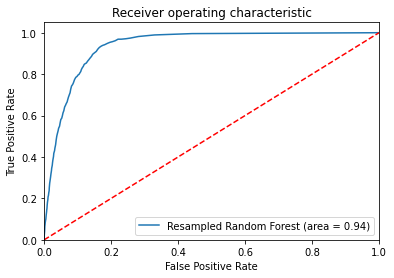

In [74]:
probs = model_rf_res.predict_proba(X_test)
preds = probs[:,1]
rfresfpr, rfrestpr, rfresthreshold = metrics.roc_curve(y_test, preds)
rfres_roc_auc = metrics.auc(rfresfpr, rfrestpr)

plt.figure()
plt.plot(rfresfpr, rfrestpr, label='Resampled Random Forest (area = %0.2f)' % rfres_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [75]:
# metrics.balanced_accuracy_score(y_test, preds)
y_test.dtypes
type(preds[1])

numpy.float64

In [76]:
model_rf_res.predict(X_test)
import collections
collections.Counter(model_rf_res.predict(X_test))

Counter({0: 7285, 1: 953})

In [77]:
metrics.balanced_accuracy_score(y_test, model_rf_res.predict(X_test))

0.7724143827539035

In [78]:
metrics.accuracy_score(y_test, model_rf_res.predict(X_test))

0.9066521000242778

In [79]:
metrics.roc_auc_score(y_test, model_rf_res.predict_proba(X_test)[:,1])

0.9365884003962451

## Feature Selection

In [80]:
# Polynomial features

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly_feats = poly.fit(X_df_2)
poly_feats_train = poly_feats.transform(X_df_2)

poly_feats.get_feature_names(input_features=X_df_2.columns)

poly_df = pd.DataFrame(poly_feats_train, columns = poly_feats.get_feature_names(input_features=X_df_2.columns))

In [81]:
# Desired no. of features

feature_counts_base = list(range(10,33))
feature_counts_poly = list(range(10,101,10))

In [82]:
# Dataframe for core set of features

X_df_2.shape

(41188, 32)

In [83]:
# Dataframe for all polynomial features

poly_df.shape

(41188, 561)

In [84]:
from sklearn.feature_selection import *
from sklearn.pipeline import Pipeline

In [85]:
X_base_red = SelectKBest(f_classif, k=20).fit_transform(X_df_2, y)

select_k_best_classifier = SelectKBest(score_func=f_classif, k=5).fit_transform(X_df_2, y)

In [86]:
X_base_red = SelectKBest(f_classif, k=5)
X_base_red.fit(X_df_2, y)
cols = X_base_red.get_support(indices=True)
X_df_2[X_df_2.columns[cols]].head()

,duration,pdays,euribor3m,nr.employed,previous_contact
0,261,999,4.857,4,0
1,149,999,4.857,4,0
2,226,999,4.857,4,0
3,151,999,4.857,4,0
4,307,999,4.857,4,0


In [87]:
def get_reduced(method, X, y, feature_n):
    method.fit(X, y)
    features = method.get_support(indices=True)
    feaure_names = X.columns[features]
    return feature_names

## Main methods

In [88]:
from sklearn import metrics

In [89]:
metrics_list = ['label', 'accuracy', 'balanced_accuracy', 'precision', 'average_precision', 'f1_score', 'recall', 'roc_auc']

In [90]:
# Method for returning metrics to create dataframe with

def logistic_metrics(clf_model, X, y, resample, normalize, label, plot_roc):
    
    # Split features and target into train and test sets.
    
    X_train, X_test, y_train, y_test = train_test_split(label_df_2, y, test_size = 0.2, random_state = 10)
    
    # If resample, create equal size of minority class with SMOTE.
    
    if resample == True:
        sm = SMOTE(random_state = 2)
        X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
    
    # If normalize, normalize data with MinMaxScaler.
    
    if normalize == True:
        scaler = MinMaxScaler(feature_range = (0,1))

        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        # normalize y test set?
    
    # Train model on training data.
    
    clf = clf_model
    model = clf.fit(X_train, y_train)
    
    # Derive vectors for class predicted and predicted probabilities.
    
    classes = model.predict(X_test)
    probs = model.predict_proba(X_test)
    preds = probs[:,1]

    # Calculate comparison metrics for classification results.
    
    accuracy = metrics.accuracy_score(classes, y_test)
    
    balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

    precision = metrics.precision_score(classes, y_test)
    
    average_precision = metrics.average_precision_score(classes, y_test)
    
    f1_score = metrics.f1_score(classes, y_test)
    
    recall = metrics.recall_score(classes, y_test)
    
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    # Plot ROC curve and AUC score.
    
    if plot_roc == True:
        plt.figure()
        plt.plot(fpr, tpr, label=label + '(area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc='lower right')
        plt.savefig(label + ' ROCs')
        plt.show()
    
    # Return list of metrics to be added to a Dataframe to compare models.
    
    return [label, accuracy, balanced_accuracy, precision, average_precision, f1_score, recall, roc_auc]

C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


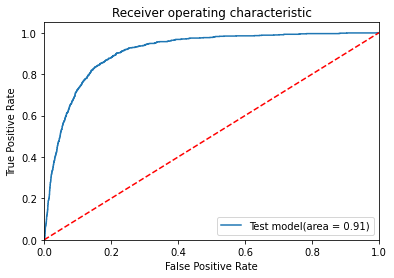

In [91]:
model_metrics = logistic_metrics(LogisticRegression(), X_df_2, y, True, True, 'Test model', True)

In [92]:
list(zip(metrics_list,model_metrics))

[('label', 'Test model'),
 ('accuracy', 0.8982762806506434),
 ('balanced_accuracy', 0.7459303385846416),
 ('precision', 0.5797413793103449),
 ('average_precision', 0.3707116063003114),
 ('f1_score', 0.562173458725183),
 ('recall', 0.5456389452332657),
 ('roc_auc', 0.9092780025001179)]

In [93]:

# Main method with Pipeline

# Method for returning metrics to create dataframe with

def logistic_metrics(sel_model, clf_model, X, y, resample, normalize, label, plot_roc):
    
    model = Pipeline(steps=[('feature_selection', sel_model), ('classifier', clf_model)])
    
    # Split features and target into train and test sets.
    
    X_train, X_test, y_train, y_test = train_test_split(label_df_2, y, test_size = 0.2, random_state = 10)
    
    # If resample, create equal size of minority class with SMOTE.
    
    if resample == True:
        sm = SMOTE(random_state = 2)
        X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
    
    # If normalize, normalize data with MinMaxScaler.
    
    if normalize == True:
        scaler = MinMaxScaler(feature_range = (0,1))

        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        # normalize y test set?
    
    # Train model on training data.
    
    model = model.fit(X_train, y_train)
    
    # Derive vectors for class predicted and predicted probabilities.
    
    classes = model.predict(X_test)
    probs = model.predict_proba(X_test)
    preds = probs[:,1]

    # Calculate comparison metrics for classification results.
    
    accuracy = metrics.accuracy_score(classes, y_test)
    
    balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

    precision = metrics.precision_score(classes, y_test)
    
    average_precision = metrics.average_precision_score(classes, y_test)
    
    f1_score = metrics.f1_score(classes, y_test)
    
    recall = metrics.recall_score(classes, y_test)
    
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    # Plot ROC curve and AUC score.
    
    if plot_roc == True:
        plt.figure()
        plt.plot(fpr, tpr, label=label + '(area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc='lower right')
        plt.savefig(label + ' ROCs')
        plt.show()
    
    # Return list of metrics to be added to a Dataframe to compare models.
    
    return [label, accuracy, balanced_accuracy, precision, average_precision, f1_score, recall, roc_auc]

In [94]:
# Test with pipeline and gridsearchcv

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,34,3))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True)

# Train and test normalization

X_train, X_test, y_train, y_test = train_test_split(X_df_2, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ajha48\Anaconda3\lib\site-

C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(

C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(

C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(

C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(

C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(

C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(

C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(

C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(

C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ajha48\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(

In [95]:
best_clf.best_estimator_.get_params()['classifier']


RandomForestClassifier(max_features=9, n_estimators=60)

In [96]:
print('Model accuracy is',best_clf.score(X_test, y_test))

Model accuracy is 0.9093226511289147


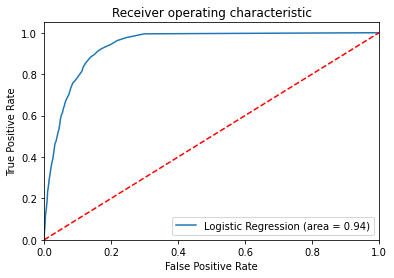

In [97]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [98]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      7692
           1       0.37      0.64      0.47       546

    accuracy                           0.91      8238
   macro avg       0.67      0.78      0.71      8238
weighted avg       0.93      0.91      0.92      8238

